# Progetto Web Intelligence

## Overview

## Descrizione del Modello dei dati

1. L'inizio del task di predizione èil primo turno del torneo
2. Il modello deve predirre chi vince fra due giocatori
3. Aggiungere dati esterni potrebbe aiutare di molto ( % servizi, stanchezza giocatore, mano della racchetta)
4. Possiamo utilizzare i dati di betting per predirre quando si vincerà in un incontro, possiamo aggiungere colonne come: La quotazione media delle scommesse, più alta, più bassa, ecc. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# CARICAMENTO DATI
dataset_path = "../datasets/tennis/2016.xlsx"

In [74]:
# CARICAMENTO DATI
def loadDataset(year):
    dataset_path = "../datasets/tennis/"+year+".xlsx"
    return pd.read_excel(dataset_path)

In [3]:
df = pd.read_excel(dataset_path)

In [4]:
df.index.name   = "Match ID"
df.columns.name = "Attributes"
df.head()



Attributes,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
Match ID,,,,,,,,,,,,,,,,,,,,,
0,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.68,2.10,1.62,2.25,1.68,2.31,1.76,2.35,1.66,2.20
1,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Kudla D.,...,1.58,2.35,1.53,2.50,1.63,2.40,1.63,2.50,1.57,2.37
2,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Kamke T.,...,1.82,1.90,1.80,2.00,1.90,1.99,1.90,2.10,1.77,2.00
3,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Chung H.,...,1.82,1.90,1.73,2.10,1.93,1.96,1.93,2.10,1.82,1.95
4,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Goffin D.,...,1.30,3.40,1.29,3.75,1.31,3.74,1.31,3.80,1.29,3.56


In [5]:
aa = df.loc[140]
for i in df.columns:
    print(i,":", aa[i])

ATP : 6
Location : Melbourne
Tournament : Australian Open
Date : 2016-01-18 00:00:00
Series : Grand Slam
Court : Outdoor
Surface : Hard
Round : 1st Round
Best of : 5
Winner : Goffin D.
Loser : Stakhovsky S.
WRank : 16.0
LRank : 60.0
WPts : 1835.0
LPts : 780.0
W1 : 3.0
L1 : 6.0
W2 : 6.0
L2 : 3.0
W3 : 6.0
L3 : 4.0
W4 : 6.0
L4 : 4.0
W5 : nan
L5 : nan
Wsets : 3.0
Lsets : 1.0
Comment : Completed
B365W : 1.12
B365L : 6.0
EXW : 1.11
EXL : 5.75
LBW : 1.12
LBL : 6.0
PSW : 1.16
PSL : 6.1
MaxW : 1.16
MaxL : 7.0
AvgW : 1.13
AvgL : 5.86


In [6]:
# import matplotlib.pyplot as plt
# import sys
# %matplotlib inline
# # use the following for more interactive plots
# # %matplotlib inline 

# fig = plt.figure()  # a new figure window
# fig.show()
# ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)
# # set a title for this sub-plot
# ax.set_title('Prova di plot', fontsize=14)
# # set tick for x-axis
# ax.set_xticks(df["Date"])
# # set labels for x-ticks (dates) and rotate them (45 degrees) for readability
# ax.set_xticklabels(df["Date"], rotation=45, fontsize=10 )
# # set a title for x-axis
# ax.set_xlabel("Dates (YYYY-MM-DD)")
# # set a title for y-axis
# ax.set_ylabel("NAO index")
# # plot nao_index as a function of dates.
# ax.plot(df["Date"],df["Winner"])


In [7]:
df.dtypes

Attributes
ATP                    int64
Location              object
Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Winner                object
Loser                 object
WRank                float64
LRank                float64
WPts                 float64
LPts                 float64
W1                   float64
L1                   float64
W2                   float64
L2                   float64
W3                   float64
L3                   float64
W4                   float64
L4                   float64
W5                   float64
L5                   float64
Wsets                float64
Lsets                float64
Comment               object
B365W                float64
B365L                float64
EXW                  float64
EXL                  float64
LBW                  float64
LBL                  float64
PSW

In [8]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object', name='Attributes')

In [9]:
# Colonne potenzialmente categoriali
strcol=[]
for col in df.columns:
    if type(df[col][0]) == str:
        strcol.append(col)
strcol        

['Location',
 'Tournament',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Winner',
 'Loser',
 'Comment']

In [10]:
strcol.remove("Location")

In [11]:
# Contenuto delle possibili colonne categoriali
for c in strcol:
    s=df[c].value_counts()
    print("COL:",c,", N VALORI DISTINTI:",len(s))
    print(s,"\n")

COL: Tournament , N VALORI DISTINTI: 66
Australian Open        127
Wimbledon              127
US Open                127
French Open            127
Sony Ericsson Open      95
                      ... 
Istanbul Open           27
Apia International      27
Chengdu Open            27
Konzum Croatia Open     27
Masters Cup             15
Name: Tournament, Length: 66, dtype: int64 

COL: Series , N VALORI DISTINTI: 5
ATP250          1054
Masters 1000     567
Grand Slam       508
ATP500           482
Masters Cup       15
Name: Series, dtype: int64 

COL: Court , N VALORI DISTINTI: 2
Outdoor    2201
Indoor      425
Name: Court, dtype: int64 

COL: Surface , N VALORI DISTINTI: 3
Hard     1503
Clay      806
Grass     317
Name: Surface, dtype: int64 

COL: Round , N VALORI DISTINTI: 8
1st Round        1172
2nd Round         752
Quarterfinals     260
3rd Round         184
Semifinals        132
The Final          66
4th Round          48
Round Robin        12
Name: Round, dtype: int64 

COL: Winn

In [12]:
# # Prima di PCA fare OHE
# from sklearn.decomposition import PCA

# pca=PCA(n_components = 2)
# X_2 = pca.fit_transform(df)

# fig, ax = plt.subplots()

# colors = np.array(['r','g','b'])

# # scatter is similar to plot, additionally a color per point is provided
# ax.scatter(X_2[:,0],X_2[:,1], c=colors[y])

# ax.set_xlabel("1st Component")
# ax.set_ylabel("2nd Component")
# ax.grid(linestyle=':', linewidth=.5)

# AUSTRALIAN OPEN 

In [13]:
openAustr = df[df["Tournament"] == "Australian Open"]
target = openAustr[openAustr["Round"]=="The Final"]

In [14]:
# Chi ha vinto nel 2019
target[["Winner","Loser", 'WRank', 'LRank','B365W', 'B365L','EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL' ]]

Attributes,Winner,Loser,WRank,LRank,B365W,B365L,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
Match ID,,,,,,,,,,,,,,,,
265,Djokovic N.,Murray A.,1.0,2.0,1.2,5.0,1.2,4.4,1.2,5.0,1.21,5.38,1.22,5.5,1.19,4.92


# INCROCIO GIOCATORI

In [15]:
# Creo un dataframe dei giocatori per vedere chi ha vinto con chi
def playerDf(full_df):
    playerList=set(df["Winner"]) | set(df["Loser"]) # Trovo tutti i giocatori singoli
    
    newDf= pd.DataFrame(data = 0, index=playerList, columns=playerList) # Creo un dataframe per vedere chi vince con chi
    
    winLoseDf = df[["Winner","Loser"]] # Per popolarlo prendo chi vince e chi perde
    
    for index, row in winLoseDf.iterrows():
#         if newDf[row["Winner"]][row["Loser"]] ==-1:
#             newDf[row["Winner"]][row["Loser"]]=0
        
        newDf.loc[row["Winner"],row["Loser"]]+=1
        newDf.loc[row["Loser"],row["Winner"]]-=1
        
    return newDf
    
    


In [16]:
aaa = playerDf(df)
aaa

,Cilic M.,Stebe C.M.,Barton M.,Duckworth J.,Bublik A.,Gomez E.,Bhambri Y.,Tsonga J.W.,Herbert P.H.,Fratangelo B.,...,Berdych T.,Li Z.,Smith J.P.,Ward A.,Kovalik J.,Olivo R.,Elias G.,Roger-Vasselin E.,Gonzalez A.,Bedene A.
Cilic M.,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Stebe C.M.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barton M.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Duckworth J.,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
Bublik A.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olivo R.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Elias G.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Roger-Vasselin E.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gonzalez A.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0


In [17]:
aaa.loc["Nadal R.","Carreno-Busta P."]

2

In [18]:
aaa.loc["Carreno-Busta P."]

Cilic M.             0
Stebe C.M.           0
Barton M.            0
Duckworth J.         0
Bublik A.            0
                    ..
Olivo R.             0
Elias G.             0
Roger-Vasselin E.    0
Gonzalez A.          0
Bedene A.            0
Name: Carreno-Busta P., Length: 304, dtype: int64

In [19]:
df[df["Winner"] == "Nadal R."].loc[:,"Winner":"Loser"]

Attributes,Winner,Loser
Match ID,,
68,Nadal R.,Carreno-Busta P.
75,Nadal R.,Haase R.
79,Nadal R.,Kuznetsov An.
82,Nadal R.,Marchenko I.
366,Nadal R.,Monaco J.
368,Nadal R.,Lorenzi P.
504,Nadal R.,Carreno-Busta P.
512,Nadal R.,Almagro N.
516,Nadal R.,Dolgopolov O.


In [20]:
aaa.describe()

,Cilic M.,Stebe C.M.,Barton M.,Duckworth J.,Bublik A.,Gomez E.,Bhambri Y.,Tsonga J.W.,Herbert P.H.,Fratangelo B.,...,Berdych T.,Li Z.,Smith J.P.,Ward A.,Kovalik J.,Olivo R.,Elias G.,Roger-Vasselin E.,Gonzalez A.,Bedene A.
count,304.000000,304.000000,304.00000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,-0.072368,0.003289,0.00000,0.013158,0.000000,0.003289,0.009868,-0.062500,0.013158,0.009868,...,-0.065789,0.006579,0.006579,0.006579,0.016447,0.000000,0.003289,0.003289,0.009868,0.023026
std,0.475151,0.057354,0.14072,0.198571,0.114897,0.057354,0.099012,0.458914,0.198571,0.206898,...,0.496470,0.080977,0.140565,0.080977,0.189822,0.229794,0.263241,0.128416,0.099012,0.329210
min,-3.000000,0.000000,-1.00000,-1.000000,-1.000000,0.000000,0.000000,-3.000000,-1.000000,-1.000000,...,-2.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# OPEN FRANCESE HA UN CONTEGGIO DEI SET DIVERSO
Il set viene vinto se si da uno scarto di due game all'avversario

In [21]:

openFr = df[df["Tournament"] == "French Open"]
target = openFr[openFr["Round"]=="The Final"]
openFr[["W1" , "L1","W2" , "L2","W3" , "L3","W4" , "L4","W5" , "L5"]]

Attributes,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5
Match ID,,,,,,,,,,
1228,7.0,6.0,7.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN
1229,6.0,2.0,4.0,6.0,6.0,4.0,1.0,6.0,6.0,4.0
1230,6.0,1.0,6.0,2.0,7.0,6.0,NaN,NaN,NaN,NaN
1231,7.0,6.0,6.0,2.0,6.0,3.0,NaN,NaN,NaN,NaN
1232,6.0,2.0,6.0,2.0,6.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1350,4.0,6.0,7.0,6.0,6.0,4.0,6.0,1.0,NaN,NaN
1351,6.0,3.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN
1352,6.0,2.0,6.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN


In [22]:

openFr["W5"].idxmax()


aa = df.loc[1292]
for i in df.columns:
    print(i,aa[i])

ATP 33
Location Paris
Tournament French Open
Date 2016-05-25 00:00:00
Series Grand Slam
Court Outdoor
Surface Clay
Round 2nd Round
Best of 5
Winner Karlovic I.
Loser Thompson J.
WRank 28.0
LRank 94.0
WPts 1280.0
LPts 608.0
W1 6.0
L1 7.0
W2 6.0
L2 3.0
W3 7.0
L3 6.0
W4 6.0
L4 7.0
W5 12.0
L5 10.0
Wsets 3.0
Lsets 2.0
Comment Completed
B365W 1.44
B365L 2.62
EXW 1.48
EXL 2.45
LBW 1.5
LBL 2.62
PSW 1.53
PSL 2.7
MaxW 1.53
MaxL 2.8
AvgW 1.47
AvgL 2.63


# MASTER CUP è L'UNICO TORNEO CON ROUND ROBIN

In [23]:
tournamentName = "Masters Cup"
tourn= df[df["Tournament"]==tournamentName]

In [24]:
for c in tourn.columns:
    print(tourn[c].value_counts())

66    15
Name: ATP, dtype: int64
London    15
Name: Location, dtype: int64
Masters Cup    15
Name: Tournament, dtype: int64
2016-11-17    2
2016-11-15    2
2016-11-18    2
2016-11-13    2
2016-11-16    2
2016-11-19    2
2016-11-14    2
2016-11-20    1
Name: Date, dtype: int64
Masters Cup    15
Name: Series, dtype: int64
Indoor    15
Name: Court, dtype: int64
Hard    15
Name: Surface, dtype: int64
Round Robin    12
Semifinals      2
The Final       1
Name: Round, dtype: int64
3    15
Name: Best of, dtype: int64
Murray A.       5
Djokovic N.     4
Raonic M.       2
Wawrinka S.     1
Nishikori K.    1
Thiem D.        1
Cilic M.        1
Name: Winner, dtype: int64
Nishikori K.    3
Monfils G.      2
Wawrinka S.     2
Thiem D.        2
Raonic M.       2
Cilic M.        2
Djokovic N.     1
Goffin D.       1
Name: Loser, dtype: int64
1.0    5
2.0    4
4.0    2
7.0    1
3.0    1
9.0    1
5.0    1
Name: WRank, dtype: int64
5.0     3
4.0     2
7.0     2
3.0     2
6.0     2
9.0     2
2.0     1
11

In [25]:
detail=tourn[["Series","Winner","Loser","Round"]]
detail

Attributes,Series,Winner,Loser,Round
Match ID,,,,
2611,Masters Cup,Djokovic N.,Thiem D.,Round Robin
2612,Masters Cup,Raonic M.,Monfils G.,Round Robin
2613,Masters Cup,Nishikori K.,Wawrinka S.,Round Robin
2614,Masters Cup,Murray A.,Cilic M.,Round Robin
2615,Masters Cup,Thiem D.,Monfils G.,Round Robin
2616,Masters Cup,Djokovic N.,Raonic M.,Round Robin
2617,Masters Cup,Murray A.,Nishikori K.,Round Robin
2618,Masters Cup,Wawrinka S.,Cilic M.,Round Robin
2619,Masters Cup,Djokovic N.,Goffin D.,Round Robin


In [26]:
set(tourn["Winner"]) | set(tourn["Loser"])

{'Cilic M.',
 'Djokovic N.',
 'Goffin D.',
 'Monfils G.',
 'Murray A.',
 'Nishikori K.',
 'Raonic M.',
 'Thiem D.',
 'Wawrinka S.'}

# ONE HOT ENCODING

In [27]:
df2 = df
df2.drop(["Location", "ATP","Tournament", "Date"],axis = 1)

Attributes,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
Match ID,,,,,,,,,,,,,,,,,,,,,
0,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,Simon G.,28.0,15.0,1360.0,...,1.68,2.10,1.62,2.25,1.68,2.31,1.76,2.35,1.66,2.20
1,ATP250,Outdoor,Hard,1st Round,3,Kudla D.,Smith J.P.,69.0,129.0,719.0,...,1.58,2.35,1.53,2.50,1.63,2.40,1.63,2.50,1.57,2.37
2,ATP250,Outdoor,Hard,1st Round,3,Kamke T.,Mitchell B.,277.0,231.0,185.0,...,1.82,1.90,1.80,2.00,1.90,1.99,1.90,2.10,1.77,2.00
3,ATP250,Outdoor,Hard,1st Round,3,Chung H.,Groth S.,51.0,60.0,817.0,...,1.82,1.90,1.73,2.10,1.93,1.96,1.93,2.10,1.82,1.95
4,ATP250,Outdoor,Hard,1st Round,3,Goffin D.,Bellucci T.,16.0,37.0,1880.0,...,1.30,3.40,1.29,3.75,1.31,3.74,1.31,3.80,1.29,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,Masters Cup,Indoor,Hard,Round Robin,3,Murray A.,Wawrinka S.,1.0,3.0,11185.0,...,1.22,3.30,1.29,3.75,1.31,3.81,1.32,4.10,1.28,3.68
2622,Masters Cup,Indoor,Hard,Round Robin,3,Cilic M.,Nishikori K.,7.0,5.0,3450.0,...,2.30,1.50,2.50,1.53,2.47,1.61,2.60,1.63,2.41,1.56
2623,Masters Cup,Indoor,Hard,Semifinals,3,Murray A.,Raonic M.,1.0,4.0,11185.0,...,1.18,3.80,1.25,4.00,1.24,4.71,1.25,5.00,1.22,4.28


In [28]:
dataOHE = pd.get_dummies(df2, columns = ["Court", "Surface","Comment"])
dataOHE

,ATP,Location,Tournament,Date,Series,Round,Best of,Winner,Loser,WRank,...,AvgW,AvgL,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Completed,Comment_Retired,Comment_Walkover
Match ID,,,,,,,,,,,,,,,,,,,,,
0,1,Brisbane,Brisbane International,2016-01-04,ATP250,1st Round,3,Dimitrov G.,Simon G.,28.0,...,1.66,2.20,0,1,0,0,1,1,0,0
1,1,Brisbane,Brisbane International,2016-01-04,ATP250,1st Round,3,Kudla D.,Smith J.P.,69.0,...,1.57,2.37,0,1,0,0,1,1,0,0
2,1,Brisbane,Brisbane International,2016-01-04,ATP250,1st Round,3,Kamke T.,Mitchell B.,277.0,...,1.77,2.00,0,1,0,0,1,1,0,0
3,1,Brisbane,Brisbane International,2016-01-04,ATP250,1st Round,3,Chung H.,Groth S.,51.0,...,1.82,1.95,0,1,0,0,1,1,0,0
4,1,Brisbane,Brisbane International,2016-01-05,ATP250,1st Round,3,Goffin D.,Bellucci T.,16.0,...,1.29,3.56,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,66,London,Masters Cup,2016-11-18,Masters Cup,Round Robin,3,Murray A.,Wawrinka S.,1.0,...,1.28,3.68,1,0,0,0,1,1,0,0
2622,66,London,Masters Cup,2016-11-18,Masters Cup,Round Robin,3,Cilic M.,Nishikori K.,7.0,...,2.41,1.56,1,0,0,0,1,1,0,0
2623,66,London,Masters Cup,2016-11-19,Masters Cup,Semifinals,3,Murray A.,Raonic M.,1.0,...,1.22,4.28,1,0,0,0,1,1,0,0


# TOP GIOCATORI 

In [29]:
dfPlayer = df.loc[:,["Date","Winner", "Loser", "WRank", "LRank","WPts","LPts"]]

In [30]:
dfPlayer.sort_values(by=["WRank", "Date"])

Attributes,Date,Winner,Loser,WRank,LRank,WPts,LPts
Match ID,,,,,,,
57,2016-01-04,Djokovic N.,Brown D.,1.0,118.0,16585.0,493.0
73,2016-01-06,Djokovic N.,Verdasco F.,1.0,49.0,16585.0,900.0
80,2016-01-07,Djokovic N.,Mayer L.,1.0,35.0,16585.0,1150.0
83,2016-01-08,Djokovic N.,Berdych T.,1.0,6.0,16585.0,4620.0
84,2016-01-09,Djokovic N.,Nadal R.,1.0,5.0,16585.0,5230.0
...,...,...,...,...,...,...,...
447,2016-02-17,Del Potro J.M.,Kudla D.,1042.0,65.0,10.0,760.0
455,2016-02-19,Del Potro J.M.,Smith J.P.,1042.0,135.0,10.0,449.0
459,2016-02-20,Del Potro J.M.,Chardy J.,1042.0,30.0,10.0,1255.0


In [31]:
# CHI è STATO TOP 12 PLAYER
topPlayer = dfPlayer[dfPlayer["WRank"] <= 12.0]
topPlayer

Attributes,Date,Winner,Loser,WRank,LRank,WPts,LPts
Match ID,,,,,,,
13,2016-01-06,Nishikori K.,Kukushkin M.,8.0,65.0,4235.0,762.0
19,2016-01-07,Federer R.,Kamke T.,3.0,277.0,8265.0,185.0
23,2016-01-08,Federer R.,Dimitrov G.,3.0,28.0,8265.0,1360.0
25,2016-01-09,Federer R.,Thiem D.,3.0,20.0,8265.0,1600.0
41,2016-01-06,Wawrinka S.,Rublev A.,4.0,185.0,6865.0,270.0
...,...,...,...,...,...,...,...
2621,2016-11-18,Murray A.,Wawrinka S.,1.0,3.0,11185.0,5115.0
2622,2016-11-18,Cilic M.,Nishikori K.,7.0,5.0,3450.0,4705.0
2623,2016-11-19,Murray A.,Raonic M.,1.0,4.0,11185.0,5050.0


In [32]:
set(topPlayer["Winner"])

{'Anderson K.',
 'Berdych T.',
 'Cilic M.',
 'Djokovic N.',
 'Federer R.',
 'Ferrer D.',
 'Gasquet R.',
 'Goffin D.',
 'Isner J.',
 'Monfils G.',
 'Murray A.',
 'Nadal R.',
 'Nishikori K.',
 'Raonic M.',
 'Thiem D.',
 'Tsonga J.W.',
 'Wawrinka S.'}

# FIT_TRASFORM PER VARIABILI NON CATEGORIALI

In [33]:
# DA SISTEMARE, ABBIAMO DUE COLONNE !

# from sklearn.preprocessing import LabelEncoder

# now encode target labels
# NON VA BENE LABEL ENCODER PERCHè PRENDE UNA COLONNA ALLA VOLTA
# label_enc = LabelEncoder()

# test = dfPlayer

# test = label_enc.fit_transform(test["Winner"])

In [34]:
playerList=set(df["Winner"]) | set(df["Loser"]) # Trovo tutti i giocatori singoli
playerList

{'Ahouda A.',
 'Albot R.',
 'Almagro N.',
 'Anderson K.',
 'Anderson O.',
 'Andreozzi G.',
 'Andujar P.',
 'Arguello F.',
 'Arnaboldi A.',
 'Arvidsson I.',
 'Bachinger M.',
 'Baghdatis M.',
 'Bagnis F.',
 'Baker B.',
 'Barrere G.',
 'Barton M.',
 'Basic M.',
 'Basilashvili N.',
 'Bautista Agut R.',
 'Bautista R.',
 'Beck A.',
 'Becker B.',
 'Bedene A.',
 'Bellier A.',
 'Bellucci T.',
 'Bemelmans R.',
 'Benneteau J.',
 'Berankis R.',
 'Berdych T.',
 'Berlocq C.',
 'Berrer M.',
 'Bhambri Y.',
 'Bolelli S.',
 'Bourgue M.',
 'Brands D.',
 'Broady L.',
 'Brown D.',
 'Bublik A.',
 'Cachin P.',
 'Cacic N.',
 'Carballes Baena R.',
 'Carreno Busta P.',
 'Carreno-Busta P.',
 'Caruso S.',
 'Cecchinato M.',
 'Cervantes I.',
 'Chardy J.',
 'Chiudinelli M.',
 'Choinski J.',
 'Chung H.',
 'Cilic M.',
 'Clezar G.',
 'Copil M.',
 'Coric B.',
 'Cuevas P.',
 'Dancevic F.',
 'Daniel T.',
 'Darcis S.',
 'De Bakker T.',
 'De Loore J.',
 'De Schepper K.',
 'Del Potro J.M.',
 'Delbonis F.',
 'Devvarman S.',
 

In [35]:
playerEncode = {}

for index, player in enumerate(playerList):
    playerEncode[player] = index

In [36]:
playerEncode

{'Cilic M.': 0,
 'Stebe C.M.': 1,
 'Barton M.': 2,
 'Duckworth J.': 3,
 'Bublik A.': 4,
 'Gomez E.': 5,
 'Bhambri Y.': 6,
 'Tsonga J.W.': 7,
 'Herbert P.H.': 8,
 'Fratangelo B.': 9,
 'Robredo T.': 10,
 'Verdasco F.': 11,
 'Fucsovics M.': 12,
 'Donskoy E.': 13,
 'Gulbis E.': 14,
 'Jarry N.': 15,
 'Willis M.': 16,
 'Bourgue M.': 17,
 'Skugor F.': 18,
 'Carreno-Busta P.': 19,
 'Smyczek T.': 20,
 'Mektic N.': 21,
 'Sonego L.': 22,
 'Ghem A.': 23,
 'Zverev A.': 24,
 'Paire B.': 25,
 'Eubanks C.': 26,
 'Carreno Busta P.': 27,
 'Rubin N.': 28,
 'Sarkissian A.': 29,
 'De Schepper K.': 30,
 'Ymer M.': 31,
 'Raonic M.': 32,
 'Venus M.': 33,
 'Delbonis F.': 34,
 'Becker B.': 35,
 'Chiudinelli M.': 36,
 'Chardy J.': 37,
 'Querrey S.': 38,
 'Samper-Montana J.': 39,
 'Krajinovic F.': 40,
 'Martin A.': 41,
 'Novikov D.': 42,
 'Lopez F.': 43,
 'Cachin P.': 44,
 'Lu Y.H.': 45,
 'Mayer L.': 46,
 'Patino L.': 47,
 'Brown D.': 48,
 'Escobar G.': 49,
 'Cuevas P.': 50,
 'Choinski J.': 51,
 'Nikles J.': 52,


In [37]:
test = dfPlayer

In [38]:
test.replace({"Winner":playerEncode, "Loser":playerEncode}, inplace = True)

In [39]:
test

Attributes,Date,Winner,Loser,WRank,LRank,WPts,LPts
Match ID,,,,,,,
0,2016-01-04,257,117,28.0,15.0,1360.0,2145.0
1,2016-01-04,148,296,69.0,129.0,719.0,459.0
2,2016-01-04,248,68,277.0,231.0,185.0,225.0
3,2016-01-04,259,118,51.0,60.0,817.0,782.0
4,2016-01-05,270,267,16.0,37.0,1880.0,1105.0
...,...,...,...,...,...,...,...
2621,2016-11-18,171,271,1.0,3.0,11185.0,5115.0
2622,2016-11-18,0,229,7.0,5.0,3450.0,4705.0
2623,2016-11-19,171,32,1.0,4.0,11185.0,5050.0


# CREARE TIPI DI DATO CATEGORICI

In [40]:
testCategory = df.loc[:,["Tournament","Series","Winner", "Loser"]]

In [41]:
testCategory

Attributes,Tournament,Series,Winner,Loser
Match ID,,,,
0,Brisbane International,ATP250,Dimitrov G.,Simon G.
1,Brisbane International,ATP250,Kudla D.,Smith J.P.
2,Brisbane International,ATP250,Kamke T.,Mitchell B.
3,Brisbane International,ATP250,Chung H.,Groth S.
4,Brisbane International,ATP250,Goffin D.,Bellucci T.
...,...,...,...,...
2621,Masters Cup,Masters Cup,Murray A.,Wawrinka S.
2622,Masters Cup,Masters Cup,Cilic M.,Nishikori K.
2623,Masters Cup,Masters Cup,Murray A.,Raonic M.


In [42]:
# DTYPE INT (?)
testCategory["Series"].value_counts()

ATP250          1054
Masters 1000     567
Grand Slam       508
ATP500           482
Masters Cup       15
Name: Series, dtype: int64

In [43]:
from pandas.api.types import CategoricalDtype

testCategory["Series"]=testCategory["Series"].astype('category')
testCategory["Series"].value_counts()

ATP250          1054
Masters 1000     567
Grand Slam       508
ATP500           482
Masters Cup       15
Name: Series, dtype: int64

In [44]:
# convertire la colonna con dtype "category" (?)


# RISPOSTA ---> TRASFORMA IN NUMERO CHE è MEGLIO !



cats_to_order = ["ATP250", "ATP500", "Masters 1000", "Masters Cup", "Grand Slam"]
covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)
testCategory['Series'] = testCategory['Series'].cat.reorder_categories(cats_to_order, ordered=True)



In [45]:
testCategory["Series"] = testCategory["Series"].cat.codes

In [46]:
for i in range(0,len(testCategory)):
    print(testCategory["Series"][i],df["Series"][i])

0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0 ATP250
0

4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam

4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam
4 Grand Slam

In [47]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object', name='Attributes')

In [48]:
df["Round"]

Match ID
0         1st Round
1         1st Round
2         1st Round
3         1st Round
4         1st Round
           ...     
2621    Round Robin
2622    Round Robin
2623     Semifinals
2624     Semifinals
2625      The Final
Name: Round, Length: 2626, dtype: object

# Cose da fare
Primo pipeline di progetto: Sistemare il dataset (elimina colonne, Labeling, aggiungere feature) $\rightarrow$ applicazione modello $\rightarrow$ commento output 

# CREO UNA FUNZIONE PER FORMATTARE IL DATASET

In [49]:


def generalFormatting(dfCopy):
    
    df = dfCopy.copy()
    
    # Cambio nome delle colonne Winner/Loser
    dictCol = {'Winner' :"Player1", 'Loser':'Player2', 'WRank':'P1_Rank', 'LRank':'P2_Rank', 'WPts':'P1_Pts', 'LPts':'P2_Pts',
       'W1':'P1_S1', 'L1':'P2_S1', 'W2':'P1_S2', "L2":'P2_S2', 'W3':'P1_S3', 'L3':'P2_S3', 'W4':'P1_S4', 'L4':'P2_S4', 'W5':'P1_S5', "L5":'P2_S5', 'Wsets':'P1_sets',
       'Lsets':'P2_sets', 'B365W':'P1_B365', 'B365L':'P2_B365', 'EXW':'P1_EX', 'EXL':'P2_EX', 'LBW':'P1_LB', 'LBL':'P2_LB', 'PSW':'P1_PS',
       'PSL':'P2_PS', 'MaxW':'P1_Max', 'MaxL':'P2_Max', 'AvgW':'P1_Avg', 'AvgL':'P2_Avg'}

    df.rename(columns=dictCol, inplace=True)
    
    playerList=set(df["Player1"]) | set(df["Player2"]) # Trovo tutti i giocatori singoli
    
    # Formattazione dei Giocatori
    playerEncode = {}
    for index, player in enumerate(playerList):
        playerEncode[player] = index
    
    df.replace({"Player1":playerEncode, "Player2":playerEncode}, inplace = True)
    
    # Fill NA
    df.fillna(0, inplace = True)
    
    # One Hot Encoding
    df = pd.get_dummies(df, columns = ["Court", "Surface","Comment", "Best of"])
    
    # Encoding Tipo torneo con peso
    df["Series"]=df["Series"].astype('category')
    cats_to_order = ["ATP250", "ATP500", "Masters 1000", "Masters Cup", "Grand Slam"]
    covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)
    df['Series'] = df['Series'].cat.reorder_categories(cats_to_order, ordered=True)
    df["Series"] = df["Series"].cat.codes
    
    # Encoding Round Torneo con peso
    df["Round"]=df["Round"].astype('category')
    cats_to_order = ["Round Robin", "1st Round",'2nd Round','3rd Round','4th Round','Quarterfinals', 'Semifinals', 'The Final']
    covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)
    df['Round'] = df['Round'].cat.reorder_categories(cats_to_order, ordered=True)
    df["Round"] = df["Round"].cat.codes
    
    # Rimozione colonne influenti
    df.drop(["Location", "ATP"], axis =1, inplace=True)
    
    # Encoding Nome tornei
    lb_make = LabelEncoder()
    df["Tournament"] = lb_make.fit_transform(df["Tournament"])
    df["target"] = 0
    
    return df
    
    

    

In [50]:
df = pd.read_excel(dataset_path)
sad = generalFormatting(df)


In [51]:
sad.head()

,Tournament,Date,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,...,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Completed,Comment_Retired,Comment_Walkover,Best of_3,Best of_5,target
0,15,2016-01-04,0,1,257,117,28.0,15.0,1360.0,2145.0,...,1,0,0,1,1,0,0,1,0,0
1,15,2016-01-04,0,1,148,296,69.0,129.0,719.0,459.0,...,1,0,0,1,1,0,0,1,0,0
2,15,2016-01-04,0,1,248,68,277.0,231.0,185.0,225.0,...,1,0,0,1,1,0,0,1,0,0
3,15,2016-01-04,0,1,259,118,51.0,60.0,817.0,782.0,...,1,0,0,1,1,0,0,1,0,0
4,15,2016-01-05,0,1,270,267,16.0,37.0,1880.0,1105.0,...,1,0,0,1,1,0,0,1,0,0


In [52]:
# columns
for i in sad.columns:
    print(i)

Tournament
Date
Series
Round
Player1
Player2
P1_Rank
P2_Rank
P1_Pts
P2_Pts
P1_S1
P2_S1
P1_S2
P2_S2
P1_S3
P2_S3
P1_S4
P2_S4
P1_S5
P2_S5
P1_sets
P2_sets
P1_B365
P2_B365
P1_EX
P2_EX
P1_LB
P2_LB
P1_PS
P2_PS
P1_Max
P2_Max
P1_Avg
P2_Avg
Court_Indoor
Court_Outdoor
Surface_Clay
Surface_Grass
Surface_Hard
Comment_Completed
Comment_Retired
Comment_Walkover
Best of_3
Best of_5
target


# Swap colonne per eterogeneità del dataset

In [53]:
def swap (a,b):
    c=a
    a=b
    b=c
    return a,b

def swapP1P2 (row):
    copy = row.copy()
    swapCol=['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB', 'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg']
    
    for i in range(0, int(len(swapCol)/2)):
        index=i*2
        aa = swapCol[index]
        bb = swapCol[index+1]
        copy[aa],copy[bb] = swap(copy[aa],copy[bb])
        copy["target"] = np.where (copy["target"] == 0, 1, 0)
        
    return copy
        

In [54]:
old = sad.loc[33]

sad.loc[33] = swapP1P2(sad.loc[33])

new = sad.loc[33]

for i in ['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
         'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB', 'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg', "target"]:
    print(i)
    print(old[i],new[i])

# Swap seems work, check it

Player1
203 182
Player2
182 203
P1_Rank
55.0 70.0
P2_Rank
70.0 55.0
P1_Pts
797.0 716.0
P2_Pts
716.0 797.0
P1_S1
6.0 3.0
P2_S1
3.0 6.0
P1_S2
6.0 4.0
P2_S2
4.0 6.0
P1_S3
0.0 0.0
P2_S3
0.0 0.0
P1_S4
0.0 0.0
P2_S4
0.0 0.0
P1_S5
0.0 0.0
P2_S5
0.0 0.0
P1_sets
2.0 0.0
P2_sets
0.0 2.0
P1_B365
1.4 2.75
P2_B365
2.75 1.4
P1_EX
1.42 2.8
P2_EX
2.8 1.42
P1_LB
1.5 2.62
P2_LB
2.62 1.5
P1_PS
1.45 2.93
P2_PS
2.93 1.45
P1_Max
1.52 3.0
P2_Max
3.0 1.52
P1_Avg
1.46 2.68
P2_Avg
2.68 1.46
target
0 1


# Random Swap delle righe

In [55]:
df.shape[0]

2626

In [56]:
np.random.randint(0,10)

2

In [57]:
def randomSwap(df):
    maxRow = df.shape[0]
    for i in range(0,1000):
        pos = np.random.randint(0,maxRow)
        old = df.loc[pos] 
        df.loc[pos] = swapP1P2(df.loc[pos])
        new = df.loc[pos]
#         for i in ['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
#         'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB', 'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg', "target"]:
#             print(i)
#             print(old[i],new[i])
        
    

In [58]:
randomSwap(sad)

sad["target"].value_counts()

0    1935
1     691
Name: target, dtype: int64

# APPLICAZIONE PRIMO MODELLO
Vince sempre il più alto in classifica

In [59]:
df = pd.read_excel(dataset_path)
firstDf = generalFormatting(df)
randomSwap(firstDf)



In [60]:
firstDf.head()

,Tournament,Date,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,...,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Completed,Comment_Retired,Comment_Walkover,Best of_3,Best of_5,target
0,15,2016-01-04,0,1,257,117,28.0,15.0,1360.0,2145.0,...,1,0,0,1,1,0,0,1,0,0
1,15,2016-01-04,0,1,148,296,69.0,129.0,719.0,459.0,...,1,0,0,1,1,0,0,1,0,0
2,15,2016-01-04,0,1,248,68,277.0,231.0,185.0,225.0,...,1,0,0,1,1,0,0,1,0,0
3,15,2016-01-04,0,1,259,118,51.0,60.0,817.0,782.0,...,1,0,0,1,1,0,0,1,0,0
4,15,2016-01-05,0,1,270,267,16.0,37.0,1880.0,1105.0,...,1,0,0,1,1,0,0,1,0,0


In [61]:
firstDf.drop("Date", axis=1, inplace = True)

In [62]:
firstDf.shape

(2626, 44)

In [63]:
y=[]
for i in range(0,firstDf.shape[0]):
    y.append(np.where(firstDf.loc[i,"P1_Rank"] < firstDf.loc[i,"P2_Rank"], 0, 1))


In [64]:
print(np.sum((y == firstDf["target"]))/firstDf.shape[0])
print(np.mean(y== firstDf["target"]))

0.6690784463061691
0.6690784463061691


# Ora si comincia a creare colonne serie

## Player1 vs Player2 win/lose ratio

In [65]:
# without name

def winLose (df):
    playerList=set(df["Player1"]) | set(df["Player2"]) # Trovo tutti i giocatori singoli
    
    playerStoric = pd.DataFrame(data = 0, index=playerList, columns=playerList) # Creo un dataframe per vedere chi vince con chi
    
    winLoseDf = df[["Player1","Player2"]] # Per popolarlo prendo chi vince e chi perde
    for index,row in df.iterrows():
        if(row["target"] == 0):
            playerStoric.loc[row["Player1"],row["Player2"]] +=1
        else:
            playerStoric.loc[row["Player2"],row["Player1"]] +=1
    
    return playerStoric

In [66]:
# Creo un dataframe dei giocatori per vedere chi ha vinto con chi
# WITH NAME OF PLAYER

def playerDf(full_df):
    playerList=set(df["Winner"]) | set(df["Loser"]) # Trovo tutti i giocatori singoli
    
    newDf= pd.DataFrame(data = 0, index=playerList, columns=playerList) # Creo un dataframe per vedere chi vince con chi
    
    winLoseDf = full_df[["Winner","Loser"]] # Per popolarlo prendo chi vince e chi perde
    
    for index, row in winLoseDf.iterrows():       
        newDf.loc[row["Winner"],row["Loser"]]+=1
        
        
    return newDf
    
    

In [67]:
playerList=set(df["Winner"]) | set(df["Loser"]) # Trovo tutti i giocatori singoli
    
    # Formattazione dei Giocatori
playerEncode = {}
for index, player in enumerate(playerList):
        playerEncode[player] = index
        
playerEncode

{'Cilic M.': 0,
 'Stebe C.M.': 1,
 'Barton M.': 2,
 'Duckworth J.': 3,
 'Bublik A.': 4,
 'Gomez E.': 5,
 'Bhambri Y.': 6,
 'Tsonga J.W.': 7,
 'Herbert P.H.': 8,
 'Fratangelo B.': 9,
 'Robredo T.': 10,
 'Verdasco F.': 11,
 'Fucsovics M.': 12,
 'Donskoy E.': 13,
 'Gulbis E.': 14,
 'Jarry N.': 15,
 'Willis M.': 16,
 'Bourgue M.': 17,
 'Skugor F.': 18,
 'Carreno-Busta P.': 19,
 'Smyczek T.': 20,
 'Mektic N.': 21,
 'Sonego L.': 22,
 'Ghem A.': 23,
 'Zverev A.': 24,
 'Paire B.': 25,
 'Eubanks C.': 26,
 'Carreno Busta P.': 27,
 'Rubin N.': 28,
 'Sarkissian A.': 29,
 'De Schepper K.': 30,
 'Ymer M.': 31,
 'Raonic M.': 32,
 'Venus M.': 33,
 'Delbonis F.': 34,
 'Becker B.': 35,
 'Chiudinelli M.': 36,
 'Chardy J.': 37,
 'Querrey S.': 38,
 'Samper-Montana J.': 39,
 'Krajinovic F.': 40,
 'Martin A.': 41,
 'Novikov D.': 42,
 'Lopez F.': 43,
 'Cachin P.': 44,
 'Lu Y.H.': 45,
 'Mayer L.': 46,
 'Patino L.': 47,
 'Brown D.': 48,
 'Escobar G.': 49,
 'Cuevas P.': 50,
 'Choinski J.': 51,
 'Nikles J.': 52,


In [68]:
wl = playerDf(df)
wl

,Cilic M.,Stebe C.M.,Barton M.,Duckworth J.,Bublik A.,Gomez E.,Bhambri Y.,Tsonga J.W.,Herbert P.H.,Fratangelo B.,...,Berdych T.,Li Z.,Smith J.P.,Ward A.,Kovalik J.,Olivo R.,Elias G.,Roger-Vasselin E.,Gonzalez A.,Bedene A.
Cilic M.,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Stebe C.M.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barton M.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Duckworth J.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bublik A.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olivo R.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Elias G.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Roger-Vasselin E.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gonzalez A.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
print(wl.loc["Kohlschreiber P.","Herbert P.H."])
print(wl.loc["Herbert P.H.","Kohlschreiber P."])

1
1


In [70]:
def rateo(p1, p2, wl):
    return wl.loc[p1, p2] / (wl.loc[p1, p2]+wl.loc[p2,p1])

for j in wl.columns:
    for k in wl.columns:
        if wl.loc[k,j] != 0 or wl.loc[j,k] != 0:
            print(j,k, "rateo",rateo(j,k,wl))

Cilic M. Verdasco F. rateo 1.0
Cilic M. Gulbis E. rateo 1.0
Cilic M. Zverev A. rateo 0.0
Cilic M. Paire B. rateo 1.0
Cilic M. Carreno Busta P. rateo 1.0
Cilic M. Delbonis F. rateo 1.0
Cilic M. Lopez F. rateo 1.0
Cilic M. Mayer L. rateo 1.0
Cilic M. Bautista R. rateo 0.0
Cilic M. Gasquet R. rateo 1.0
Cilic M. Stakhovsky S. rateo 1.0
Cilic M. Dutra Silva R. rateo 1.0
Cilic M. Johnson S. rateo 1.0
Cilic M. Monaco J. rateo 1.0
Cilic M. Stepanek R. rateo 0.0
Cilic M. Karlovic I. rateo 0.5
Cilic M. De Bakker T. rateo 1.0
Cilic M. Baker B. rateo 1.0
Cilic M. Simon G. rateo 0.0
Cilic M. Coric B. rateo 1.0
Cilic M. Djokovic N. rateo 1.0
Cilic M. Trungelliti M. rateo 0.0
Cilic M. Federer R. rateo 0.0
Cilic M. Haase R. rateo 1.0
Cilic M. Kyrgios N. rateo 0.0
Cilic M. Kohlschreiber P. rateo 0.0
Cilic M. Murray A. rateo 0.3333333333333333
Cilic M. Harrison R. rateo 0.5
Cilic M. Ramos-Vinolas A. rateo 1.0
Cilic M. Kuznetsov An. rateo 1.0
Cilic M. Isner J. rateo 0.0
Cilic M. Zverev M. rateo 1.0
Cilic

Carreno-Busta P. Thiem D. rateo 0.0
Carreno-Busta P. Monfils G. rateo 0.0
Smyczek T. Duckworth J. rateo 0.0
Smyczek T. Querrey S. rateo 0.0
Smyczek T. Lopez F. rateo 0.0
Smyczek T. Gimeno-Traver D. rateo 1.0
Smyczek T. Fritz T. rateo 1.0
Smyczek T. Del Potro J.M. rateo 0.0
Smyczek T. Kyrgios N. rateo 0.0
Smyczek T. Polansky P. rateo 0.0
Smyczek T. Isner J. rateo 1.0
Smyczek T. Monteiro T. rateo 1.0
Smyczek T. Young D. rateo 0.6666666666666666
Smyczek T. Kamke T. rateo 0.0
Smyczek T. Dzumhur D. rateo 0.0
Smyczek T. Paul T. rateo 1.0
Smyczek T. Troicki V. rateo 0.0
Smyczek T. Kicker N. rateo 1.0
Mektic N. Mayer L. rateo 0.0
Mektic N. Vesely J. rateo 0.0
Mektic N. El Amrani R. rateo 1.0
Sonego L. Sousa J. rateo 0.0
Ghem A. Olivo R. rateo 0.0
Zverev A. Cilic M. rateo 1.0
Zverev A. Tsonga J.W. rateo 0.0
Zverev A. Herbert P.H. rateo 1.0
Zverev A. Paire B. rateo 1.0
Zverev A. Becker B. rateo 1.0
Zverev A. Lu Y.H. rateo 0.0
Zverev A. Jaziri M. rateo 0.6666666666666666
Zverev A. Edmund K. rateo

Chiudinelli M. Mathieu P.H. rateo 0.0
Chiudinelli M. Smith J.P. rateo 1.0
Chardy J. Duckworth J. rateo 1.0
Chardy J. Verdasco F. rateo 0.0
Chardy J. Donskoy E. rateo 1.0
Chardy J. Gulbis E. rateo 1.0
Chardy J. Carreno Busta P. rateo 0.0
Chardy J. Rubin N. rateo 1.0
Chardy J. Mayer L. rateo 1.0
Chardy J. Mahut N. rateo 0.0
Chardy J. Zayid M. S. rateo 1.0
Chardy J. Johnson S. rateo 0.0
Chardy J. Vesely J. rateo 0.0
Chardy J. Fritz T. rateo 0.0
Chardy J. Del Potro J.M. rateo 0.0
Chardy J. Pavlasek A. rateo 1.0
Chardy J. Marchenko I. rateo 0.0
Chardy J. Berlocq C. rateo 0.0
Chardy J. Pospisil V. rateo 0.0
Chardy J. Murray A. rateo 0.0
Chardy J. Opelka R. rateo 0.0
Chardy J. Ramos-Vinolas A. rateo 0.0
Chardy J. Kuznetsov An. rateo 0.3333333333333333
Chardy J. Gonzalez M. rateo 0.0
Chardy J. Ebden M. rateo 1.0
Chardy J. Mmoh M. rateo 1.0
Chardy J. Nishikori K. rateo 0.0
Chardy J. Bautista Agut R. rateo 0.5
Chardy J. Muller G. rateo 0.0
Chardy J. Cacic N. rateo 1.0
Chardy J. Dimitrov G. rateo

Nikles J. Youzhny M. rateo 0.0
Bolelli S. Paire B. rateo 0.0
Bolelli S. Sarkissian A. rateo 0.0
Bolelli S. Bautista R. rateo 0.0
Bolelli S. Baker B. rateo 1.0
Bolelli S. Fritz T. rateo 0.0
Bolelli S. Coric B. rateo 0.0
Bolelli S. Daniel T. rateo 1.0
Bolelli S. Nishikori K. rateo 0.0
Bolelli S. Tomic B. rateo 0.0
Bolelli S. Gabashvili T. rateo 0.0
Sidorenko A. Lorenzi P. rateo 0.0
Sidorenko A. Ramos-Vinolas A. rateo 1.0
Kuzmanov D. Berankis R. rateo 0.0
Devvarman S. Rublev A. rateo 0.0
Jaziri M. Robredo T. rateo 0.0
Jaziri M. Verdasco F. rateo 0.0
Jaziri M. Zverev A. rateo 0.3333333333333333
Jaziri M. Paire B. rateo 0.0
Jaziri M. Raonic M. rateo 0.0
Jaziri M. Cuevas P. rateo 0.0
Jaziri M. Ward J. rateo 1.0
Jaziri M. Albot R. rateo 1.0
Jaziri M. Johnson S. rateo 0.0
Jaziri M. Mannarino A. rateo 0.0
Jaziri M. Mayer F. rateo 1.0
Jaziri M. Pella G. rateo 1.0
Jaziri M. Millot V. rateo 1.0
Jaziri M. Simon G. rateo 0.0
Jaziri M. Djokovic N. rateo 0.0
Jaziri M. Berankis R. rateo 0.5
Jaziri M. F

Zayid M. S. Chardy J. rateo 0.0
Sela D. Verdasco F. rateo 1.0
Sela D. Delbonis F. rateo 0.0
Sela D. Becker B. rateo 1.0
Sela D. Querrey S. rateo 0.0
Sela D. Novikov D. rateo 1.0
Sela D. Brown D. rateo 0.0
Sela D. Cuevas P. rateo 0.0
Sela D. Fritz T. rateo 0.0
Sela D. Marchenko I. rateo 0.0
Sela D. Berankis R. rateo 0.0
Sela D. Ram R. rateo 1.0
Sela D. Sousa J. rateo 1.0
Sela D. Fognini F. rateo 0.0
Sela D. Baghdatis M. rateo 0.0
Sela D. Kuznetsov An. rateo 0.0
Sela D. Isner J. rateo 0.0
Sela D. Lacko L. rateo 1.0
Sela D. Hernych J. rateo 1.0
Sela D. Seppi A. rateo 0.0
Sela D. Rublev A. rateo 1.0
Sela D. Dimitrov G. rateo 0.0
Sela D. Ferrer D. rateo 0.0
Johnson S. Cilic M. rateo 0.0
Johnson S. Barton M. rateo 0.0
Johnson S. Tsonga J.W. rateo 1.0
Johnson S. Verdasco F. rateo 0.0
Johnson S. Donskoy E. rateo 1.0
Johnson S. Zverev A. rateo 1.0
Johnson S. Delbonis F. rateo 1.0
Johnson S. Becker B. rateo 0.0
Johnson S. Chardy J. rateo 1.0
Johnson S. Cuevas P. rateo 1.0
Johnson S. Jaziri M. ra

Pella G. Garcia-Lopez G. rateo 0.0
Pella G. Young D. rateo 1.0
Pella G. Darcis S. rateo 1.0
Pella G. Estrella Burgos V. rateo 0.0
Pella G. Goffin D. rateo 0.0
Pella G. Herbert P.H rateo 0.0
Pella G. Thiem D. rateo 1.0
Pella G. Ungur A. rateo 1.0
Pella G. Youzhny M. rateo 0.0
Copil M. Mannarino A. rateo 0.0
Copil M. Sousa J. rateo 1.0
Copil M. Pouille L. rateo 0.0
Copil M. Darcis S. rateo 1.0
Copil M. Dzumhur D. rateo 0.0
Copil M. Chung H. rateo 1.0
Copil M. Goffin D. rateo 0.0
Schwartzman D. Verdasco F. rateo 1.0
Schwartzman D. Delbonis F. rateo 0.5
Schwartzman D. Lu Y.H. rateo 0.0
Schwartzman D. Cuevas P. rateo 1.0
Schwartzman D. Gasquet R. rateo 0.0
Schwartzman D. Mahut N. rateo 1.0
Schwartzman D. Pella G. rateo 0.0
Schwartzman D. Fritz T. rateo 1.0
Schwartzman D. Simon G. rateo 1.0
Schwartzman D. Del Potro J.M. rateo 0.0
Schwartzman D. Lorenzi P. rateo 0.3333333333333333
Schwartzman D. Haase R. rateo 0.0
Schwartzman D. Pospisil V. rateo 0.0
Schwartzman D. Ram R. rateo 1.0
Schwartzma

Pavlasek A. Basilashvili N. rateo 0.0
Pavlasek A. Granollers M. rateo 1.0
Hewitt L. Duckworth J. rateo 1.0
Hewitt L. Ferrer D. rateo 0.0
Moeller M. Zemlja G. rateo 0.0
Lapentti G. Falla A. rateo 0.0
Myneni S. Vesely J. rateo 0.0
Djokovic N. Cilic M. rateo 0.0
Djokovic N. Tsonga J.W. rateo 1.0
Djokovic N. Fratangelo B. rateo 1.0
Djokovic N. Robredo T. rateo 1.0
Djokovic N. Verdasco F. rateo 1.0
Djokovic N. Raonic M. rateo 1.0
Djokovic N. Querrey S. rateo 0.0
Djokovic N. Lopez F. rateo 0.5
Djokovic N. Lu Y.H. rateo 1.0
Djokovic N. Mayer L. rateo 1.0
Djokovic N. Brown D. rateo 1.0
Djokovic N. Jaziri M. rateo 1.0
Djokovic N. Ward J. rateo 1.0
Djokovic N. Edmund K. rateo 1.0
Djokovic N. Halys Q. rateo 1.0
Djokovic N. Mannarino A. rateo 1.0
Djokovic N. Vesely J. rateo 0.5
Djokovic N. Stepanek R. rateo 1.0
Djokovic N. Simon G. rateo 1.0
Djokovic N. Coric B. rateo 1.0
Djokovic N. Janowicz J. rateo 1.0
Djokovic N. Federer R. rateo 1.0
Djokovic N. Pospisil V. rateo 1.0
Djokovic N. Nadal R. rateo

Haase R. Cilic M. rateo 0.0
Haase R. Duckworth J. rateo 0.0
Haase R. Verdasco F. rateo 0.0
Haase R. Lopez F. rateo 0.0
Haase R. Patino L. rateo 1.0
Haase R. Andujar P. rateo 1.0
Haase R. Mannarino A. rateo 0.0
Haase R. De Bakker T. rateo 1.0
Haase R. Schwartzman D. rateo 1.0
Haase R. Simon G. rateo 0.0
Haase R. Del Potro J.M. rateo 0.0
Haase R. Basic M. rateo 0.0
Haase R. Nadal R. rateo 0.0
Haase R. Sousa J. rateo 1.0
Haase R. Anderson K. rateo 0.0
Haase R. Rosol L. rateo 0.0
Haase R. Dolgopolov O. rateo 0.0
Haase R. Zeballos H. rateo 1.0
Haase R. Sock J. rateo 0.0
Haase R. Monteiro T. rateo 1.0
Haase R. Tomic B. rateo 1.0
Haase R. Seppi A. rateo 0.0
Haase R. Muller G. rateo 0.0
Haase R. Karatsev A. rateo 1.0
Haase R. Dzumhur D. rateo 0.0
Haase R. Mathieu P.H. rateo 1.0
Haase R. Arnaboldi A. rateo 1.0
Haase R. Bedene A. rateo 1.0
Pavic A. Garcia-Lopez G. rateo 0.0
Pavic A. Almagro N. rateo 1.0
Basic M. Bhambri Y. rateo 1.0
Basic M. Haase R. rateo 1.0
Basic M. Garcia-Lopez G. rateo 0.0


Sousa J. Halys Q. rateo 1.0
Sousa J. Mahut N. rateo 1.0
Sousa J. Sela D. rateo 0.0
Sousa J. Vesely J. rateo 0.0
Sousa J. Karlovic I. rateo 1.0
Sousa J. Copil M. rateo 0.0
Sousa J. Djokovic N. rateo 0.0
Sousa J. Khachanov K. rateo 0.0
Sousa J. Haase R. rateo 0.0
Sousa J. Pospisil V. rateo 1.0
Sousa J. Nadal R. rateo 0.0
Sousa J. Fognini F. rateo 0.0
Sousa J. Murray A. rateo 0.0
Sousa J. Tursunov D. rateo 1.0
Sousa J. Anderson K. rateo 1.0
Sousa J. Giraldo S. rateo 1.0
Sousa J. Montanes A. rateo 0.0
Sousa J. Sock J. rateo 1.0
Sousa J. Bemelmans R. rateo 0.0
Sousa J. Nishikori K. rateo 1.0
Sousa J. Tomic B. rateo 0.0
Sousa J. Seppi A. rateo 1.0
Sousa J. Almagro N. rateo 0.0
Sousa J. Bautista Agut R. rateo 0.0
Sousa J. Rublev A. rateo 1.0
Sousa J. Dimitrov G. rateo 0.0
Sousa J. Dzumhur D. rateo 1.0
Sousa J. Estrella Burgos V. rateo 1.0
Sousa J. Goffin D. rateo 0.0
Sousa J. Granollers M. rateo 1.0
Sousa J. Bagnis F. rateo 0.0
Sousa J. Thiem D. rateo 0.0
Sousa J. Klizan M. rateo 1.0
Sousa J.

Wu D. Cuevas P. rateo 1.0
Wu D. Kravchuk K. rateo 1.0
Wu D. Simon G. rateo 0.0
Wu D. Krajicek A. rateo 0.0
Wu D. Thiem D. rateo 0.0
Wessels L. Diez S. rateo 1.0
Wessels L. Klizan M. rateo 0.0
Ramos-Vinolas A. Cilic M. rateo 0.0
Ramos-Vinolas A. Tsonga J.W. rateo 0.0
Ramos-Vinolas A. Verdasco F. rateo 0.5
Ramos-Vinolas A. Donskoy E. rateo 1.0
Ramos-Vinolas A. Carreno-Busta P. rateo 0.0
Ramos-Vinolas A. Raonic M. rateo 1.0
Ramos-Vinolas A. Delbonis F. rateo 0.0
Ramos-Vinolas A. Chardy J. rateo 1.0
Ramos-Vinolas A. Querrey S. rateo 1.0
Ramos-Vinolas A. Lopez F. rateo 1.0
Ramos-Vinolas A. Lu Y.H. rateo 1.0
Ramos-Vinolas A. Brown D. rateo 0.0
Ramos-Vinolas A. Cuevas P. rateo 0.0
Ramos-Vinolas A. Sidorenko A. rateo 0.0
Ramos-Vinolas A. Gasquet R. rateo 0.0
Ramos-Vinolas A. Mannarino A. rateo 0.5
Ramos-Vinolas A. Carballes Baena R. rateo 1.0
Ramos-Vinolas A. Munar J. rateo 1.0
Ramos-Vinolas A. De Bakker T. rateo 0.0
Ramos-Vinolas A. Coric B. rateo 1.0
Ramos-Vinolas A. Khachanov K. rateo 0.5
R

Dodig I. Jaziri M. rateo 0.0
Dodig I. Halys Q. rateo 0.0
Dodig I. Monaco J. rateo 0.0
Dodig I. Ito T. rateo 0.0
Dodig I. Coric B. rateo 0.0
Dodig I. Marchenko I. rateo 0.0
Dodig I. Anderson O. rateo 1.0
Dodig I. Kohlschreiber P. rateo 0.0
Dodig I. Anderson K. rateo 0.0
Dodig I. Nishioka Y. rateo 0.0
Dodig I. Benneteau J. rateo 1.0
Dodig I. Bellucci T. rateo 1.0
Dodig I. Thiem D. rateo 0.0
Dodig I. Youzhny M. rateo 1.0
Dodig I. Berdych T. rateo 0.0
Dodig I. Elias G. rateo 0.0
Dolgopolov O. Donskoy E. rateo 1.0
Dolgopolov O. Sarkissian A. rateo 1.0
Dolgopolov O. Raonic M. rateo 0.0
Dolgopolov O. Querrey S. rateo 0.0
Dolgopolov O. Gasquet R. rateo 0.0
Dolgopolov O. Edmund K. rateo 1.0
Dolgopolov O. Johnson S. rateo 1.0
Dolgopolov O. Schwartzman D. rateo 0.0
Dolgopolov O. Cervantes I. rateo 1.0
Dolgopolov O. Khachanov K. rateo 1.0
Dolgopolov O. Thompson J. rateo 1.0
Dolgopolov O. Berankis R. rateo 1.0
Dolgopolov O. Federer R. rateo 0.0
Dolgopolov O. Dancevic F. rateo 1.0
Dolgopolov O. Haas

Nishikori K. Murray A. rateo 0.5
Nishikori K. Krajicek A. rateo 1.0
Nishikori K. Pouille L. rateo 1.0
Nishikori K. Harrison R. rateo 1.0
Nishikori K. Kuznetsov An. rateo 1.0
Nishikori K. Isner J. rateo 1.0
Nishikori K. Dolgopolov O. rateo 1.0
Nishikori K. Garcia-Lopez G. rateo 1.0
Nishikori K. Tomic B. rateo 0.0
Nishikori K. Young D. rateo 1.0
Nishikori K. Muller G. rateo 1.0
Nishikori K. Benneteau J. rateo 1.0
Nishikori K. Dimitrov G. rateo 1.0
Nishikori K. Lajovic D. rateo 1.0
Nishikori K. Wawrinka S. rateo 0.6666666666666666
Nishikori K. Herbert P.H rateo 1.0
Nishikori K. Thiem D. rateo 1.0
Nishikori K. Troicki V. rateo 1.0
Nishikori K. Monfils G. rateo 1.0
Nishikori K. Kukushkin M. rateo 1.0
Nishikori K. Youzhny M. rateo 1.0
Monteiro T. Tsonga J.W. rateo 1.0
Monteiro T. Smyczek T. rateo 0.0
Monteiro T. Cuevas P. rateo 0.0
Monteiro T. Simon G. rateo 1.0
Monteiro T. Haase R. rateo 0.0
Monteiro T. Munoz-De La Nava D. rateo 1.0
Monteiro T. Zverev M. rateo 1.0
Monteiro T. Bellier A. rat

Benneteau J. Donaldson J. rateo 1.0
Benneteau J. Dodig I. rateo 0.0
Benneteau J. Zeballos H. rateo 1.0
Benneteau J. Nishikori K. rateo 0.0
Benneteau J. Almagro N. rateo 0.0
Benneteau J. Klizan M. rateo 1.0
Benneteau J. Ferrer D. rateo 1.0
Benneteau J. Smith J.P. rateo 1.0
Cacic N. Chardy J. rateo 0.0
Cacic N. Bedene A. rateo 1.0
Rublev A. Zverev A. rateo 0.0
Rublev A. Devvarman S. rateo 1.0
Rublev A. Sela D. rateo 0.0
Rublev A. Cervantes I. rateo 0.0
Rublev A. Sousa J. rateo 0.0
Rublev A. Wawrinka S. rateo 0.0
Rublev A. Kukushkin M. rateo 1.0
Kamke T. Smyczek T. rateo 1.0
Kamke T. Zverev A. rateo 0.0
Kamke T. Cuevas P. rateo 0.0
Kamke T. Mitchell B. rateo 1.0
Kamke T. Stakhovsky S. rateo 1.0
Kamke T. Albot R. rateo 1.0
Kamke T. Federer R. rateo 0.0
Kamke T. Zeballos H. rateo 0.0
Kamke T. Ymer E. rateo 1.0
Kamke T. Granollers M. rateo 0.0
Kudryavtsev A. Lu Y.H. rateo 0.0
Kudryavtsev A. Ramanathan R. rateo 0.0
Karatsev A. Donskoy E. rateo 0.0
Karatsev A. Haase R. rateo 0.0
Istomin D. Cil

Broady L. Murray A. rateo 0.0
Broady L. Evans D. rateo 0.0
Sugita Y. Zverev A. rateo 1.0
Sugita Y. Raonic M. rateo 0.0
Sugita Y. Mahut N. rateo 1.0
Sugita Y. Johnson S. rateo 0.0
Sugita Y. Weintraub A. rateo 1.0
Sugita Y. Fritz T. rateo 1.0
Sugita Y. Coric B. rateo 0.0
Sugita Y. Pospisil V. rateo 1.0
Sugita Y. Seppi A. rateo 0.0
Sugita Y. Almagro N. rateo 0.0
Sugita Y. Dimitrov G. rateo 0.0
Sugita Y. Granollers M. rateo 0.0
Sugita Y. Monfils G. rateo 0.0
Goffin D. Cilic M. rateo 0.6666666666666666
Goffin D. Verdasco F. rateo 1.0
Goffin D. Gulbis E. rateo 1.0
Goffin D. Zverev A. rateo 0.0
Goffin D. Paire B. rateo 1.0
Goffin D. Raonic M. rateo 0.0
Goffin D. Querrey S. rateo 1.0
Goffin D. Lopez F. rateo 1.0
Goffin D. Mayer L. rateo 1.0
Goffin D. Jaziri M. rateo 0.0
Goffin D. Stakhovsky S. rateo 1.0
Goffin D. Mahut N. rateo 1.0
Goffin D. Mayer F. rateo 1.0
Goffin D. Vesely J. rateo 1.0
Goffin D. Pella G. rateo 1.0
Goffin D. Copil M. rateo 1.0
Goffin D. Schwartzman D. rateo 0.0
Goffin D. Si

Klizan M. Murray A. rateo 0.0
Klizan M. Baghdatis M. rateo 1.0
Klizan M. Wessels L. rateo 1.0
Klizan M. Robert S. rateo 1.0
Klizan M. Rosol L. rateo 1.0
Klizan M. Seppi A. rateo 1.0
Klizan M. Benneteau J. rateo 0.0
Klizan M. Lazov A. rateo 1.0
Klizan M. Troicki V. rateo 0.0
Klizan M. Monfils G. rateo 1.0
Klizan M. Kukushkin M. rateo 0.0
Klizan M. Youzhny M. rateo 0.0
Volandri F. Khachanov K. rateo 0.0
Volandri F. Ferrer D. rateo 0.0
Mathieu P.H. Zverev A. rateo 0.5
Mathieu P.H. Paire B. rateo 1.0
Mathieu P.H. Chiudinelli M. rateo 1.0
Mathieu P.H. Chardy J. rateo 0.0
Mathieu P.H. Brown D. rateo 0.0
Mathieu P.H. Cuevas P. rateo 0.0
Mathieu P.H. Gasquet R. rateo 0.0
Mathieu P.H. Albot R. rateo 0.0
Mathieu P.H. Edmund K. rateo 0.0
Mathieu P.H. Mahut N. rateo 0.0
Mathieu P.H. Simon G. rateo 0.0
Mathieu P.H. Coric B. rateo 0.0
Mathieu P.H. Melzer G. rateo 1.0
Mathieu P.H. Haase R. rateo 0.0
Mathieu P.H. Ram R. rateo 1.0
Mathieu P.H. Millman J. rateo 1.0
Mathieu P.H. Baghdatis M. rateo 0.0
Ma

Ward A. Dancevic F. rateo 0.0
Ward A. Goffin D. rateo 0.0
Kovalik J. Cuevas P. rateo 0.0
Kovalik J. Trungelliti M. rateo 0.0
Kovalik J. Pospisil V. rateo 0.0
Kovalik J. Sijsling I. rateo 1.0
Kovalik J. Fognini F. rateo 0.0
Kovalik J. Montanes A. rateo 0.0
Kovalik J. Garcia-Lopez G. rateo 1.0
Kovalik J. Laaksonen H. rateo 0.0
Kovalik J. Herbert P.H rateo 1.0
Kovalik J. Thiem D. rateo 0.0
Kovalik J. Fabbiano T. rateo 0.0
Olivo R. Verdasco F. rateo 1.0
Olivo R. Ghem A. rateo 1.0
Olivo R. Delbonis F. rateo 0.0
Olivo R. Cuevas P. rateo 0.0
Olivo R. Jaziri M. rateo 0.0
Olivo R. Mahut N. rateo 0.0
Olivo R. Vesely J. rateo 1.0
Olivo R. Kohlschreiber P. rateo 1.0
Olivo R. Fognini F. rateo 0.0
Olivo R. Gonzalez M. rateo 1.0
Olivo R. Estrella Burgos V. rateo 0.0
Olivo R. Lajovic D. rateo 0.0
Olivo R. Bagnis F. rateo 1.0
Olivo R. Ferrer D. rateo 0.0
Olivo R. Youzhny M. rateo 1.0
Olivo R. Gonzalez A. rateo 1.0
Elias G. Verdasco F. rateo 0.0
Elias G. Carreno Busta P. rateo 1.0
Elias G. Cuevas P. rat

In [71]:
dummyWinLosRate = df.copy()

dummyWinLosRate["P1_WinRateo"] = 0
dummyWinLosRate["P2_WinRateo"] = 0

dummyWinLosRate["P1_WinRateo"].astype("float")
dummyWinLosRate["P2_WinRateo"].astype("float")

for index, row in dummyWinLosRate.iterrows():
    dummyWinLosRate.loc[index,"P1_WinRateo"] = rateo(row["Winner"],row["Loser"],wl)
    dummyWinLosRate.loc["P2_WinRateo"] = rateo(row["Loser"],row["Winner"],wl)
    # print(row["P1_WinRateo"], row["P2_WinRateo"])

dummyWinLosRate

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL,P1_WinRateo,P2_WinRateo
0,1.0,Brisbane,Brisbane International,2016-01-04 00:00:00,ATP250,Outdoor,Hard,1st Round,3.0,Dimitrov G.,...,1.62,2.25,1.68,2.31,1.76,2.35,1.66,2.20,0.75,0.0
1,1.0,Brisbane,Brisbane International,2016-01-04 00:00:00,ATP250,Outdoor,Hard,1st Round,3.0,Kudla D.,...,1.53,2.50,1.63,2.40,1.63,2.50,1.57,2.37,1.00,0.0
2,1.0,Brisbane,Brisbane International,2016-01-04 00:00:00,ATP250,Outdoor,Hard,1st Round,3.0,Kamke T.,...,1.80,2.00,1.90,1.99,1.90,2.10,1.77,2.00,1.00,0.0
3,1.0,Brisbane,Brisbane International,2016-01-04 00:00:00,ATP250,Outdoor,Hard,1st Round,3.0,Chung H.,...,1.73,2.10,1.93,1.96,1.93,2.10,1.82,1.95,1.00,0.0
4,1.0,Brisbane,Brisbane International,2016-01-05 00:00:00,ATP250,Outdoor,Hard,1st Round,3.0,Goffin D.,...,1.29,3.75,1.31,3.74,1.31,3.80,1.29,3.56,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,66.0,London,Masters Cup,2016-11-18 00:00:00,Masters Cup,Indoor,Hard,Round Robin,3.0,Cilic M.,...,2.50,1.53,2.47,1.61,2.60,1.63,2.41,1.56,1.00,0.0
2623,66.0,London,Masters Cup,2016-11-19 00:00:00,Masters Cup,Indoor,Hard,Semifinals,3.0,Murray A.,...,1.25,4.00,1.24,4.71,1.25,5.00,1.22,4.28,1.00,0.0
2624,66.0,London,Masters Cup,2016-11-19 00:00:00,Masters Cup,Indoor,Hard,Semifinals,3.0,Djokovic N.,...,1.22,4.33,1.25,4.55,1.26,5.00,1.23,4.20,1.00,0.0
2625,66.0,London,Masters Cup,2016-11-20 00:00:00,Masters Cup,Indoor,Hard,The Final,3.0,Murray A.,...,2.75,1.44,2.65,1.56,2.80,1.57,2.60,1.50,0.40,0.0


In [72]:
dummyWinLosRate["P1_WinRateo"].value_counts()

1.000000    2330
0.500000     210
0.666667      46
0.333333      23
0.750000       9
0.600000       4
0.250000       3
0.400000       2
Name: P1_WinRateo, dtype: int64

# Applicazione decision tree

Starting point for future test, imported function

In [81]:
# Mi serve per sapere l'encoding dei giocatori 
def playEncode(df):
    playerList=set(df["Winner"]) | set(df["Loser"]) # Trovo tutti i giocatori singoli
    
    # Formattazione dei Giocatori
    playerEncode = {}
    for index, player in enumerate(playerList):
        playerEncode[player] = index
        
    return playerEncode

In [86]:
# Formattazione generale del dataset
def generalFormatting(dfCopy, playerEncode):
    
    df = dfCopy.copy()
    
    # Cambio nome delle colonne Winner/Loser
    dictCol = {'Winner' :"Player1", 'Loser':'Player2', 'WRank':'P1_Rank', 'LRank':'P2_Rank', 'WPts':'P1_Pts', 'LPts':'P2_Pts',
       'W1':'P1_S1', 'L1':'P2_S1', 'W2':'P1_S2', "L2":'P2_S2', 'W3':'P1_S3', 'L3':'P2_S3', 'W4':'P1_S4', 'L4':'P2_S4', 'W5':'P1_S5', "L5":'P2_S5', 'Wsets':'P1_sets',
       'Lsets':'P2_sets', 'B365W':'P1_B365', 'B365L':'P2_B365', 'EXW':'P1_EX', 'EXL':'P2_EX', 'LBW':'P1_LB', 'LBL':'P2_LB', 'PSW':'P1_PS',
       'PSL':'P2_PS', 'MaxW':'P1_Max', 'MaxL':'P2_Max', 'AvgW':'P1_Avg', 'AvgL':'P2_Avg'}

    df.rename(columns=dictCol, inplace=True)
    
    df.replace({"Player1":playerEncode, "Player2":playerEncode}, inplace = True)
    
    # Fill NA
    df.fillna(0, inplace = True)
    
    # One Hot Encoding
    df = pd.get_dummies(df, columns = ["Court", "Surface","Comment", "Best of"])
    
    # Encoding Tipo torneo con peso
    df["Series"]=df["Series"].astype('category')
    cats_to_order = ["ATP250", "ATP500", "Masters 1000", "Masters Cup", "Grand Slam"]
    covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)
    df['Series'] = df['Series'].cat.reorder_categories(cats_to_order, ordered=True)
    df["Series"] = df["Series"].cat.codes
    
    # Encoding Round Torneo con peso
    df["Round"]=df["Round"].astype('category')
    cats_to_order = ["Round Robin", "1st Round",'2nd Round','3rd Round','4th Round','Quarterfinals', 'Semifinals', 'The Final']
    covered_type = CategoricalDtype(categories=cats_to_order, ordered=True)
    df['Round'] = df['Round'].cat.reorder_categories(cats_to_order, ordered=True)
    df["Round"] = df["Round"].cat.codes
    
    # Rimozione colonne influenti
    df.drop(["Location", "ATP"], axis =1, inplace=True)
    
    # Encoding Nome tornei
    lb_make = LabelEncoder()
    df["Tournament"] = lb_make.fit_transform(df["Tournament"])
    df["target"] = 0
    
    return df
    

In [100]:
# Swap tra due valori
def swap (a,b):
    c=a
    a=b
    b=c
    return a,b

# Effetua lo swap dei valori di una riga
def swapP1P2 (row):
    copy = row.copy()
    swapCol=['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB', 'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg']
    
    for i in range(0, int(len(swapCol)/2)):
        index=i*2
        aa = swapCol[index]
        bb = swapCol[index+1]
        copy[aa],copy[bb] = swap(copy[aa],copy[bb])
        copy["target"] = np.where (copy["target"] == 0, 1, 0)
        
    return copy
        
# Data un dataframe fa swap di colonne di righe random
def randomSwap(df):
    maxRow = df.shape[0]
    for i in range(0,1000):
        pos = np.random.randint(0,maxRow)
        df.loc[pos] = swapP1P2(df.loc[pos])

In [110]:
dfTree = loadDataset("2016")
dfTree.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.68,2.10,1.62,2.25,1.68,2.31,1.76,2.35,1.66,2.20
1,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Kudla D.,...,1.58,2.35,1.53,2.50,1.63,2.40,1.63,2.50,1.57,2.37
2,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Kamke T.,...,1.82,1.90,1.80,2.00,1.90,1.99,1.90,2.10,1.77,2.00
3,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3,Chung H.,...,1.82,1.90,1.73,2.10,1.93,1.96,1.93,2.10,1.82,1.95
4,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3,Goffin D.,...,1.30,3.40,1.29,3.75,1.31,3.74,1.31,3.80,1.29,3.56


In [111]:
playerEncodeDfTree = playEncode(dfTree)

In [112]:
dfTreeFormatted = generalFormatting(dfTree, playerEncodeDfTree)

In [113]:
randomSwap(dfTreeFormatted)

In [114]:
dfTreeFormatted.columns

Index(['Tournament', 'Date', 'Series', 'Round', 'Player1', 'Player2',
       'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg',
       'Court_Indoor', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Comment_Completed', 'Comment_Retired',
       'Comment_Walkover', 'Best of_3', 'Best of_5', 'target'],
      dtype='object')

In [115]:
# Drop di tutte le colonne che non ho al momento della previsione

In [116]:
noInfoCol = ['P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg',
       'Court_Indoor', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Comment_Completed', 'Comment_Retired',
       'Comment_Walkover', 'Best of_3', 'Best of_5']

In [117]:
dfTreeFormatted.drop(noInfoCol, axis = 1, inplace = True)

In [118]:
# drop della data
dfTreeFormatted.drop("Date", axis = 1, inplace = True)

In [120]:
dfTreeFormatted

,Tournament,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,target
0,15,0,1,257,117,28.0,15.0,1360.0,2145.0,0
1,15,0,1,148,296,69.0,129.0,719.0,459.0,0
2,15,0,1,248,68,277.0,231.0,185.0,225.0,0
3,15,0,1,118,259,60.0,51.0,782.0,817.0,1
4,15,0,1,267,270,37.0,16.0,1105.0,1880.0,1
...,...,...,...,...,...,...,...,...,...,...
2621,37,3,0,171,271,1.0,3.0,11185.0,5115.0,0
2622,37,3,0,0,229,7.0,5.0,3450.0,4705.0,0
2623,37,3,6,32,171,4.0,1.0,5050.0,11185.0,1
2624,37,3,6,130,229,2.0,5.0,10780.0,4705.0,0


In [124]:
# Rimuovo anche i giocatori perchè l'albero non ha senso che splitti per quei valori
dfTreeFormattedPlayer = dfTreeFormatted[["Player1", "Player2"]]
dfTreeFormatted.drop(["Player1", "Player2"], axis = 1, inplace = True)

In [125]:
from sklearn.model_selection import train_test_split

X = dfTreeFormatted.drop("target", axis = 1)
y= dfTreeFormatted["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Test Accuracy: 0.6228373702422145


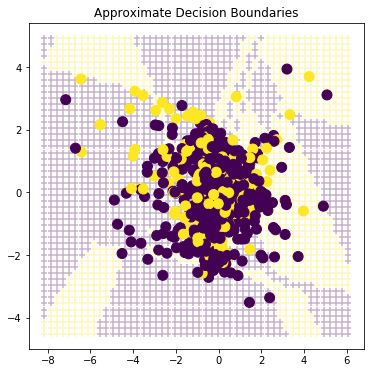

In [127]:
# Decision boundary ploy
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# needed for PCA
scaler = StandardScaler()
scaler.fit(X_train)

# training a decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini') # try gini vs. entropy
dt.fit( scaler.transform(X_train),
        y_train)
# make it 2d
pca = PCA(n_components=2)
pca.fit( scaler.transform(X_train) )

# create projection grid starting form test points
X_2d = pca.transform( scaler.transform(X_test) )
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 50) 
               for yy in np.linspace(y_min, y_max, 50) ]
zz = np.array(zz)
Z = dt.predict(pca.inverse_transform(zz))

# Put the result into a color plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(zz[:,0], zz[:,1], c=Z, marker='+', alpha=0.3)

# Plot also the test points
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, s=100)

ax.set_title("Approximate Decision Boundaries")

# compute Accuracy

from sklearn.metrics import accuracy_score
y_pred = dt.predict(scaler.transform(X_test))

print ("Test Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )


In [129]:
# MAX Leaves stop criteria
from sklearn import tree

for max_leaves in range(2,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)


Leaves: 2  - Train Accuracy: 0.7498578737919273  - Test Accuracy: 0.7231833910034602
Leaves: 3  - Train Accuracy: 0.7498578737919273  - Test Accuracy: 0.7231833910034602
Leaves: 4  - Train Accuracy: 0.763501989766913  - Test Accuracy: 0.7393310265282583
Leaves: 5  - Train Accuracy: 0.7652075042637863  - Test Accuracy: 0.7450980392156863
Leaves: 6  - Train Accuracy: 0.7652075042637863  - Test Accuracy: 0.7450980392156863
Leaves: 7  - Train Accuracy: 0.7652075042637863  - Test Accuracy: 0.7450980392156863
Leaves: 8  - Train Accuracy: 0.7652075042637863  - Test Accuracy: 0.7450980392156863
Leaves: 9  - Train Accuracy: 0.7669130187606594  - Test Accuracy: 0.7450980392156863
Leaves: 10  - Train Accuracy: 0.7669130187606594  - Test Accuracy: 0.7450980392156863
Leaves: 11  - Train Accuracy: 0.7691870380898238  - Test Accuracy: 0.7427912341407151
Leaves: 12  - Train Accuracy: 0.7754405912450256  - Test Accuracy: 0.7393310265282583
Leaves: 13  - Train Accuracy: 0.778283115406481  - Test Accurac

In [130]:
# MAX depths stop criteria

for max_depth in range(1,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    print ("Depth:", max_depth, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)

Depth: 1  - Train Accuracy: 0.7498578737919273  - Test Accuracy: 0.7231833910034602
Depth: 2  - Train Accuracy: 0.7515633882888004  - Test Accuracy: 0.7289504036908881
Depth: 3  - Train Accuracy: 0.7663445139283684  - Test Accuracy: 0.7439446366782007
Depth: 4  - Train Accuracy: 0.7686185332575327  - Test Accuracy: 0.7416378316032295
Depth: 5  - Train Accuracy: 0.7799886299033542  - Test Accuracy: 0.734717416378316
Depth: 6  - Train Accuracy: 0.7919272313814667  - Test Accuracy: 0.7358708189158016
Depth: 7  - Train Accuracy: 0.808982376350199  - Test Accuracy: 0.6966551326412919
Depth: 8  - Train Accuracy: 0.832291074474133  - Test Accuracy: 0.7012687427912342
Depth: 9  - Train Accuracy: 0.8601478112563957  - Test Accuracy: 0.6955017301038062
Depth: 10  - Train Accuracy: 0.8862990335417851  - Test Accuracy: 0.6931949250288351
Depth: 11  - Train Accuracy: 0.9090392268334281  - Test Accuracy: 0.6920415224913494
Depth: 12  - Train Accuracy: 0.9260943718021604  - Test Accuracy: 0.683967704

In [131]:
# Trying train - validation - test Split

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)

accuracies = []

for max_leaves in range(2,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}".format(
        max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most data
dt = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves:  2 - Train Accuracy: 0.743 - Validation Accuracy: 0.750
Leaves:  3 - Train Accuracy: 0.763 - Validation Accuracy: 0.737
Leaves:  4 - Train Accuracy: 0.767 - Validation Accuracy: 0.733
Leaves:  5 - Train Accuracy: 0.767 - Validation Accuracy: 0.733
Leaves:  6 - Train Accuracy: 0.767 - Validation Accuracy: 0.733
Leaves:  7 - Train Accuracy: 0.767 - Validation Accuracy: 0.733
Leaves:  8 - Train Accuracy: 0.767 - Validation Accuracy: 0.733
Leaves:  9 - Train Accuracy: 0.771 - Validation Accuracy: 0.730
Leaves: 10 - Train Accuracy: 0.775 - Validation Accuracy: 0.724
Leaves: 11 - Train Accuracy: 0.771 - Validation Accuracy: 0.730
Leaves: 12 - Train Accuracy: 0.775 - Validation Accuracy: 0.724
Leaves: 13 - Train Accuracy: 0.777 - Validation Accuracy: 0.726
Leaves: 14 - Train Accuracy: 0.778 - Validation Accuracy: 0.726
Leaves: 15 - Train Accuracy: 0.781 - Validation Accuracy: 0.735
Leaves: 16 - Train Accuracy: 0.780 - Validation Accuracy: 0.735
Leaves: 17 - Train Accuracy: 0.782 - Val